# <I><font color = 'yellow'>Importing important packages nad libraries.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from keras.layers import *
from keras.models import Model
from keras.applications import VGG16

from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
import os

import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.activations import relu

import keras
from keras.applications import VGG16
from keras.layers import *


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <I>Practicing masking

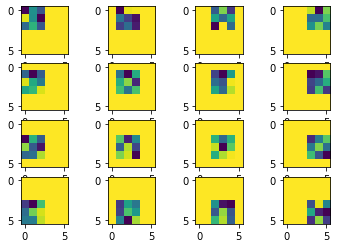

In [3]:
a = np.ones((6,6))
fig,ax = plt.subplots(nrows=4, ncols=4)
for i in range(4):
  for j in range(4): 
    b = a.copy()  
    b[i:3+i,j:3+j] = np.random.rand(3,3)
    b = tf.convert_to_tensor(b)
    ax[i,j].imshow(b)


In [4]:
!mkdir '/content/drive/MyDrive/MS_project_2'

mkdir: cannot create directory ‘/content/drive/MyDrive/MS_project_2’: File exists


# <I>Reading data

In [6]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator( rescale=1/255.)

train_data = datagen.flow_from_directory( '/content/drive/MyDrive/chest/train',target_size=(128,128),batch_size=1)
test_data = datagen.flow_from_directory('/content/drive/MyDrive/chest/test',target_size=(128,128),batch_size=1)

Found 5247 images belonging to 3 classes.
Found 609 images belonging to 3 classes.


In [12]:
#!rm -r '/content/sample_data/img_files'
!mkdir '/content/sample_data/img_files'

In [13]:

def apply_mask(img_x,count,name = None):
  import numpy as np
  import pickle
  from tqdm import tqdm
  import matplotlib.pyplot as plt
  masked = []
  c = count
  for k in range(4):
    if k>=1:
      for l in range(4):
        if l>0 and l<3:
          f = np.array(img_x).copy()
          f[0,0+k*32:32+k*32,0+l*32:32+l*32,:] = np.zeros((32,32,3))
          masked.append(f)

  pickle.dump(masked,open('/content/sample_data/img_files/'+name+'_'+str(c)+'.pkl','wb'))   


  return    




In [14]:
count = 0
y_tr = []
#fig,ax = plt.subplots(45,1)
for i,j  in train_data:
  if count < 5247:
    apply_mask(i,count,'train')
    y_tr.append(j)
    #ax[count].imshow(i.reshape(128,128,3))
    #fig.set_figheight(100,100)
    #fig.set_figwidth(100,100)
    count += 1
  else:
    break  

In [ ]:
import pickle
train_0 = pickle.load(open('/content/drive/MyDrive/MS_project/train_0','rb'))

fig,ax = plt.subplots(45,1)
for i in range(45):
  fig.set_figheight(150)
  fig.set_figwidth(150)
  ax[i].imshow(train_0[i].reshape(128,128,3))

# <I><font color='yellow'>Preparing train data

In [16]:
import pickle
train_0 = []
train_1 = []
train_2 = []
train_3 = []
train_4 = []
train_5 = []


for i in range(5247):
    f = pickle.load(open('/content/sample_data/img_files/train_'+str(i)+'.pkl','rb'))
    train_0.append(f[0].reshape(128,128,3))
    train_1.append(f[1].reshape(128,128,3))
    train_2.append(f[2].reshape(128,128,3))
    train_3.append(f[3].reshape(128,128,3))
    train_4.append(f[4].reshape(128,128,3))
    train_5.append(f[5].reshape(128,128,3))


v = 0
for i in [train_0,train_1,train_2,train_3,train_4,train_5]:
  pickle.dump(i,open('/content/drive/MyDrive/MS_project_2/train_'+str(v),'wb'))  
  v+=1  


In [18]:
pickle.dump(y_tr,open('/content/drive/MyDrive/MS_project_2/y_tr.pkl','wb'))

In [21]:
!rm -r '/content/sample_data/img_files'
!mkdir '/content/sample_data/img_files'

In [22]:
count = 0
y_test = []
#fig,ax = plt.subplots(15,1)
for i,j  in test_data:
  if count < 609:
    apply_mask(i,count,'test')
    y_test.append(j)
    #ax[count].imshow(i.reshape(128,128,3))
    #fig.set_figheight(100,100)
    #fig.set_figwidth(100,100)
    count += 1
  else:
    break  

In [ ]:
import pickle
test_0 = pickle.load(open('/content/sample_data/img_files/test_0.pkl','rb'))

fig,ax = plt.subplots(6,1)
for i in range(6):
  fig.set_figheight(15)
  fig.set_figwidth(15)
  ax[i].imshow(test_0[i].reshape(128,128,3))

# <I><font color='yellow'>Preparing test data

In [37]:
test_0 = []
test_1 = []
test_2 = []
test_3 = []
test_4 = []
test_5 = []



for i in range(609):
    f = pickle.load(open('/content/sample_data/img_files/test_'+str(i)+'.pkl','rb'))
    test_0.append(f[0].reshape(128,128,3))
    test_1.append(f[1].reshape(128,128,3))
    test_2.append(f[2].reshape(128,128,3))
    test_3.append(f[3].reshape(128,128,3))
    test_4.append(f[4].reshape(128,128,3))
    test_5.append(f[5].reshape(128,128,3))


v = 0
for i in [test_0,test_1,test_2,test_3,test_4,test_5]:
  pickle.dump(i,open('/content/drive/MyDrive/MS_project_2/test_'+str(v),'wb'))  
  v+=1  


In [25]:
pickle.dump(y_test,open('/content/drive/MyDrive/MS_project_2/y_test.pkl','wb'))

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


# <font color='yellow'><I>Initializing and compiling ResNet50

In [38]:
from keras.applications import VGG16, ResNet50
from keras.layers import *
tf.config.experimental_run_functions_eagerly(True)

model = ResNet50(include_top=False, weights='imagenet',input_shape=(128,128,3), classes=3)

x = Flatten()(model.layers[-1].output)
x = BatchNormalization()(x)
x = Dense(4096,activation='relu')(x)
x = Dense(2048,activation='relu')(x)
out = Dense(3, activation='relu')(x)

my_model = Model(inputs = model.input, outputs = out)

my_model.summary()

from keras.optimizers import Adam
opt = Adam(lr=0.001)
my_model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

keras.utils.plot_model(my_model)

In [ ]:
#Preparing target value.
y_train = []
y_ts = []
for i in y_tr:
  y_train.append(i[0])

for i in y_test:
  y_ts.append(i[0])  

y_train = np.asarray(y_train)
y_ts = np.asarray(y_ts)  

In [43]:
y_ts.shape

(609, 3)

# <I><font color='yellow'> Using Transfer learning where the base models used are <font color='orane'><br>1. VGG16 <br> 2.ResNet50 <font color='orane'><br> with weights trained on imagenet dataset.

<font color='orange'> <h2><I>1. ResNet50

   1/5247 [..............................] - ETA: 12:18 - loss: nan - accuracy: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


5247/5247 [==============================] - 770s 147ms/step - loss: nan - accuracy: 0.2581 - val_loss: nan - val_accuracy: 0.3990
************************************************** Model training on dataset : 0  and max val_accuracy as 0.39901477098464966 **************************************************
5247/5247 [==============================] - 778s 148ms/step - loss: nan - accuracy: 0.2581 - val_loss: nan - val_accuracy: 0.3842
************************************************** Model training on dataset : 1  and max val_accuracy as 0.3842364549636841 **************************************************
5247/5247 [==============================] - 765s 146ms/step - loss: nan - accuracy: 0.2581 - val_loss: nan - val_accuracy: 0.3727
************************************************** Model training on dataset : 2  and max val_accuracy as 0.3727422058582306 **************************************************
5247/5247 [==============================] - 764s 146ms/step - loss: nan - acc

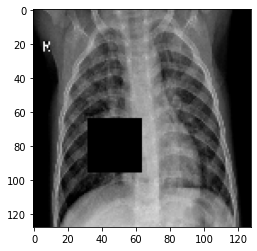

In [46]:
val_acc = []
img = []
for i in range(6):
  data_tr = np.asarray(pickle.load(open('/content/drive/MyDrive/MS_project_2/train_'+str(i),'rb')))
  data_test = np.asarray(pickle.load(open('/content/drive/MyDrive/MS_project_2/test_'+str(i),'rb')))
  img.append(data_test[0])
  history = my_model.fit(data_tr,y_train, epochs = 1, batch_size=1,validation_data=(data_test,y_ts))
  val_acc.append(min(history.history['val_accuracy']))
  print('*'*50, 'Model training on dataset :',i,' and max val_accuracy as',min(history.history['val_accuracy']),'*'*50)
indx = val_acc.index(min(val_acc))
plt.imshow(img[indx].reshape(128,128,3))

In [ ]:
history = my_model.fit(train_data, epochs = 10, batch_size=1,validation_data=(test_data))

<font color='orange'> <h2><I>2. VGG16

58892288/58889256 [==============================] - 0s 0us/step
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
____________________________________________________________

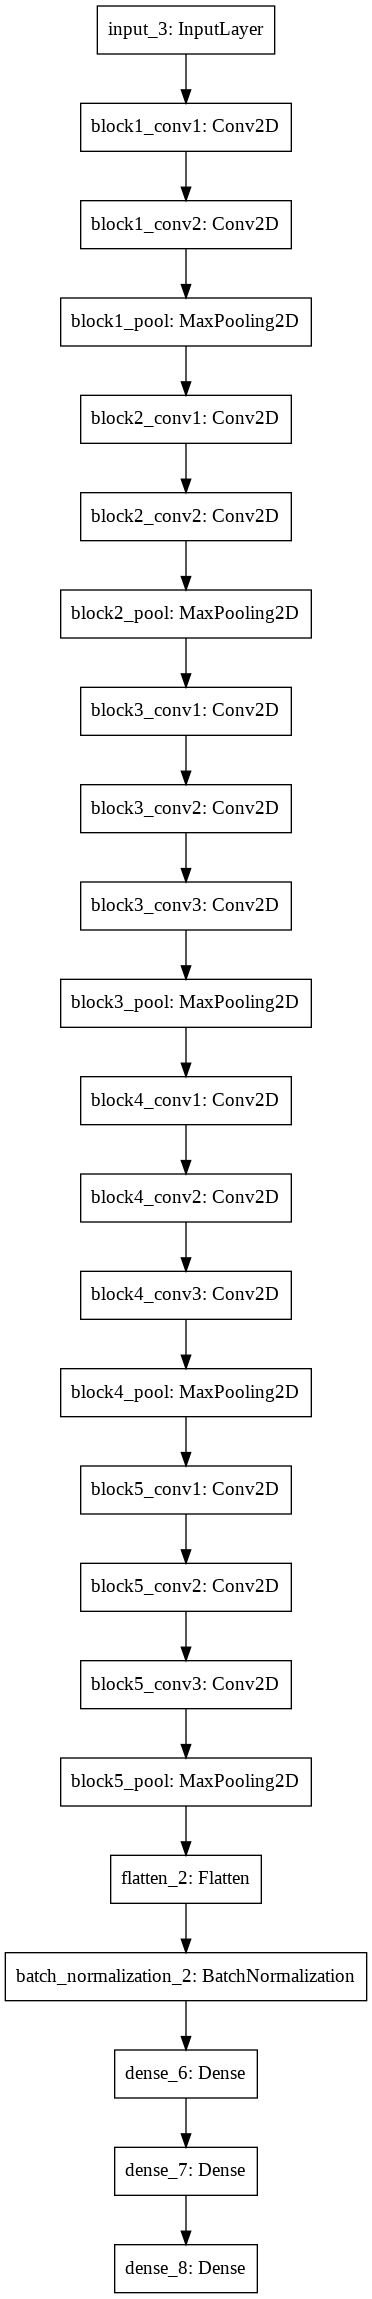

In [52]:
from keras.applications import VGG16, ResNet50
from keras.layers import *
tf.config.experimental_run_functions_eagerly(True)

model = VGG16(include_top=False, weights='imagenet',input_shape=(128,128,3), classes=3)

x = Flatten()(model.layers[-1].output)
x = BatchNormalization()(x)
x = Dense(4096,activation='relu')(x)
x = Dense(2048,activation='relu')(x)
out = Dense(3, activation='relu')(x)

my_model = Model(inputs = model.input, outputs = out)

my_model.summary()

from keras.optimizers import Adam
opt = Adam(lr=0.001)
my_model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

keras.utils.plot_model(my_model)

# <I><font color='yellow'>We have 6 dataset and in each dataset we have difeerent mask applied and training model for every dataset. 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


5247/5247 [==============================] - 164s 31ms/step - loss: nan - accuracy: 0.2559 - val_loss: nan - val_accuracy: 0.4565
************************************************** Model training on dataset : 0  and max val_accuracy as 0.4564860463142395 **************************************************
5247/5247 [==============================] - 164s 31ms/step - loss: nan - accuracy: 0.2581 - val_loss: nan - val_accuracy: 0.4138
************************************************** Model training on dataset : 1  and max val_accuracy as 0.4137931168079376 **************************************************
5247/5247 [==============================] - 164s 31ms/step - loss: nan - accuracy: 0.2581 - val_loss: nan - val_accuracy: 0.4039
************************************************** Model training on dataset : 2  and max val_accuracy as 0.403940886259079 **************************************************
5247/5247 [==============================] - 164s 31ms/step - loss: nan - accuracy:

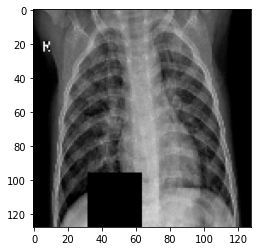

In [53]:
val_acc = []
img = []
for i in range(6):
  data_tr = np.asarray(pickle.load(open('/content/drive/MyDrive/MS_project_2/train_'+str(i),'rb')))
  data_test = np.asarray(pickle.load(open('/content/drive/MyDrive/MS_project_2/test_'+str(i),'rb')))
  img.append(data_test[0])
  history = my_model.fit(data_tr,y_train, epochs = 1, batch_size=1,validation_data=(data_test,y_ts))
  val_acc.append(min(history.history['val_accuracy']))
  print('*'*50, 'Model training on dataset :',i,' and max val_accuracy as',min(history.history['val_accuracy']),'*'*50)
indx = val_acc.index(min(val_acc))
plt.imshow(img[indx].reshape(128,128,3))

model.save('/content/drive/MyDrive/MS_project_2/vgg16.h5',save_format='h5')

# <I>Query image Prediction

In [83]:
#!rm -r '/content/sample_data/img_files'

In [97]:
#Loading a querry image for testing the model from each class of the dataset.

img_r = tf.keras.preprocessing.image.load_img('/content/right.jpeg',target_size=(128,128,3))
img_r = tf.keras.preprocessing.image.img_to_array( img_r)
img_r = img_r/255.

img_l = tf.keras.preprocessing.image.load_img('/content/left.jpeg',target_size=(128,128,3))
img_l = tf.keras.preprocessing.image.img_to_array( img_l)
img_l = img_l/255.

img_n = tf.keras.preprocessing.image.load_img('/content/norm.jpeg',target_size=(128,128,3))
img_n = tf.keras.preprocessing.image.img_to_array( img_n)
img_n = img_n/255.

In [100]:
img_l.shape

(128, 128, 3)

# <I> <font color='orange'>Testing the trained model  

In [101]:


def apply_mask(img_x,name = None):
  """
  This function applies mask to a single image on 6 different parts of the image.
  The image size is 128*128 and mask size is 32*32 with stride = 32. 
  For every image we will have 6 variants of images with different masks. 
  """

  import numpy as np
  import pickle
  from tqdm import tqdm
  import matplotlib.pyplot as plt
  masked = []
 
  for k in range(4):
    if k>=1:
      for l in range(4):
        if l>0 and l<3:
          f = np.array(img_x).copy()
          f = f.reshape((1,128,128,3))
          f[0,0+k*32:32+k*32,0+l*32:32+l*32,:] = np.random.rand(32,32,3)
          masked.append(f)

  pickle.dump(masked,open('/content/sample_data/img_files/img_'+name+'.pkl','wb')) 
  #This dumping for every image has to be done to avoid notebook from crashing.
  #After every iterration I am saving the 6 images of a single image in list.    


  return    




apply_mask(img_l,'l_6')
apply_mask(img_r,'r_6')
apply_mask(img_n,'n_6')


In [102]:
img_l_6 = pickle.load(open('/content/sample_data/img_files/img_l_6.pkl','rb'))
img_r_6 = pickle.load(open('/content/sample_data/img_files/img_r_6.pkl','rb'))
img_n_6 = pickle.load(open('/content/sample_data/img_files/img_n_6.pkl','rb'))
len(img_r_6),len(img_l_6),len(img_n_6)

(6, 6, 6)

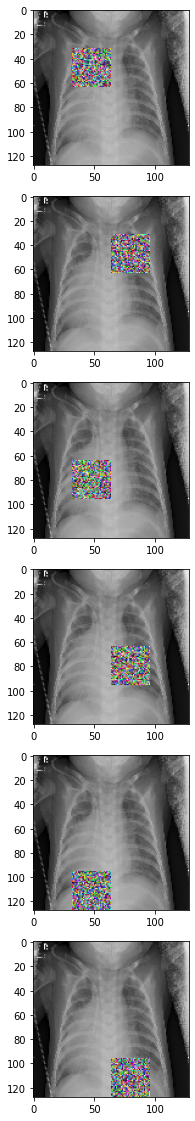

In [106]:
fig,ax = plt.subplots(6,1)
for i in range(len(img_r_6)):
  fig.set_figheight(20)
  fig.set_figwidth(20)
  ax[i].imshow(img_l_6[i].reshape(128,128,3))

In [111]:
for img in img_l_6:
  print(my_model.predict(img)[0].max())

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


5.2064915
6.0443144
8.95198
5.3886843
8.7395
3.9218984


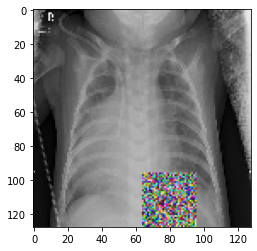

In [114]:
plt.imshow(img_l_6[-1].reshape(128,128,3))

In [119]:
for img in img_r_6:
  print(my_model.predict(img)[0])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[0.       1.947768 6.124782]
[0.        3.3384128 0.       ]
[0.63338035 1.8130602  0.88510394]
[0.       4.926276 0.      ]
[0.        1.2093987 1.239874 ]
[0.        0.        0.2852742]


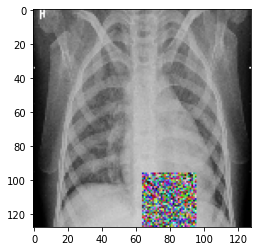

In [116]:
plt.imshow(img_r_6[-1].reshape(128,128,3))

In [118]:
for img in img_n_6:
  print(my_model.predict(img)[0])
 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[0.        0.        3.5690315]
[0.        1.9273516 2.6671357]
[0.        0.        2.7175083]
[0.        0.        4.0660257]
[0.        0.        1.9487996]
[0.       0.       4.565721]


In [ ]:
plt.imshow(img_n_6[-1].reshape(128,128,3)) 

In [121]:
img_l.shape

(128, 128, 3)

In [122]:
img_l_6[0].shape

(1, 128, 128, 3)

In [126]:
print(my_model.predict(img_l.reshape(1, 128, 128, 3)))
print(my_model.predict(img_r.reshape(1, 128, 128, 3)))
print(my_model.predict(img_n.reshape(1, 128, 128, 3)))

[[0.       2.528176 0.      ]]
[[1.7078067 0.        2.7661448]]
[[0.        0.        3.7494783]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


The chest is having VIRAL PNEUMONIA!
Do you want more information? y/n?y


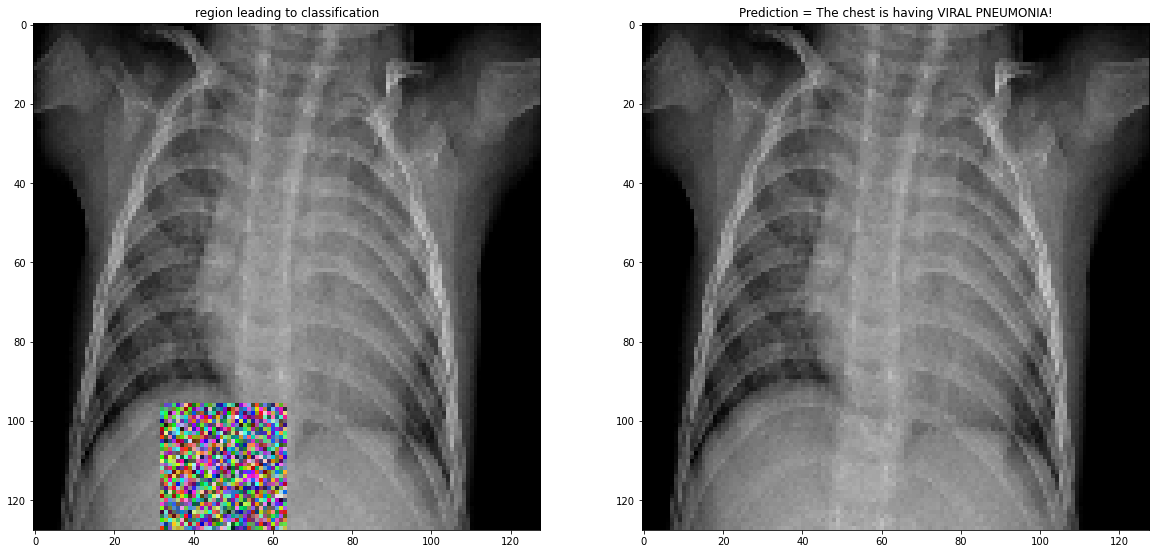

In [136]:
def prediction(model,img_128_128_3):
  import pickle
  #img_128_128_3 = tf.keras.preprocessing.image.img_to_array(img_128_128_3)
  #img_128_128_3 = img_128_128_3/255.
  img_128_128_3 = img_128_128_3.reshape(1,128,128,3)

  name = 'querry'
  apply_mask(img_128_128_3,name)
  img_list = pickle.load(open('/content/sample_data/img_files/img_'+name+'.pkl','rb'))

  mask_pred = []
  for img in img_list: 
    mask_pred.append(model.predict(img)[0])

  real_pred = model.predict(img_128_128_3)[0]
  real_indx = list(real_pred).index(real_pred.max())
  
  p = ''
  if real_indx == 0:
    p = 'The chest is NORMAL'
    print('The chest is NORMAL')
  elif real_indx == 1:
    print('The chest is having BACTERIAL PNEUMANIA!')
    p = 'The chest is having BACTERIAL PNEUMANIA!'
  else:
    print('The chest is having VIRAL PNEUMONIA!') 
    p = 'The chest is having VIRAL PNEUMONIA!'  

  consent = input('Do you want more information? y/n?')

  fig,ax = plt.subplots(1,2)

  if consent == 'y':
    indx = [i[real_indx] for i in mask_pred] 
    min_indx = indx.index(np.array(indx).min())

    fig.set_figheight(20)  
    fig.set_figwidth(20)
    ax[0].set_title('region leading to classification')
    ax[0].imshow(img_list[min_indx].reshape(128,128,3))  
    ax[1].set_title('Prediction = '+p)
    ax[1].imshow(img_128_128_3.reshape(128,128,3))
  return 

prediction(my_model,img_n)